### [ 펭귄 데이터 분석 및 인사이트 도출 ]

- 주제
    * Palmer Penguins 데이터를 활용한 종별 신체 특성 분석 및 환경 요인 인사이트 도출
- 과제 목표
    * palmerpenguins데이터를활용하여펭귄의종(species),섬(island),성별(sex)에따른신체특성차이를분석
    * 수치형변수간관계탐색및시각화진행으로의미있는패턴발견
    * 데이터전처리→탐색→분석→인사이트도출까지전과정을실습


In [3]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [4]:
## 파일 가져와서 정보 확인
df = pd.read_csv('./penguins.csv')
df.info()
display(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
## 타입 변환
# species(펭귄의종)             : category
# island(발견된섬)              : category
# sex                          : category
# year                         : 그대로
# bill_length_mm(부리길이)      : 그대로
# bill_depth_mm(부리깊이)       : 그대로
# flipper_length_mm(날개길이)   : 그대로
# body_mass_g(몸무게)           : 그대로

## category로 형변환
cols=['species','island','sex']
for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
 7   year               344 non-null    int64   
dtypes: category(3), float64(4), int64(1)
memory usage: 15.0 KB


In [6]:
## 결측치 확인 및 처리
df.isna().sum() ## 총 데이터에서 19개 존재

## isna를 출력했을 때, 총 결측치 개수는 19개. 340개의 총 데이터에서 5% 정도 되는 데이터임으로 결측치는 버리는걸 택함
df.dropna(inplace=True)
df.head()

## df.isna().sum()
# species               0
# island                0
# bill_length_mm        2
# bill_depth_mm         2
# flipper_length_mm     2
# body_mass_g           2
# sex                  11
# year                  0
# dtype: int64

## df.info()
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 344 entries, 0 to 343
# Data columns (total 8 columns):
#  #   Column             Non-Null Count  Dtype   
# ---  ------             --------------  -----   
#  0   species            344 non-null    category
#  1   island             344 non-null    category
#  2   bill_length_mm     342 non-null    float64 
#  3   bill_depth_mm      342 non-null    float64 
#  4   flipper_length_mm  342 non-null    float64 
#  5   body_mass_g        342 non-null    float64 
#  6   sex                333 non-null    category
#  7   year               344 non-null    int64   
# dtypes: category(3), float64(4), int64(1)


# df.isna().sum() # 결측치 있는지 확인용

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


['Adelie', 'Gentoo', 'Chinstrap']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

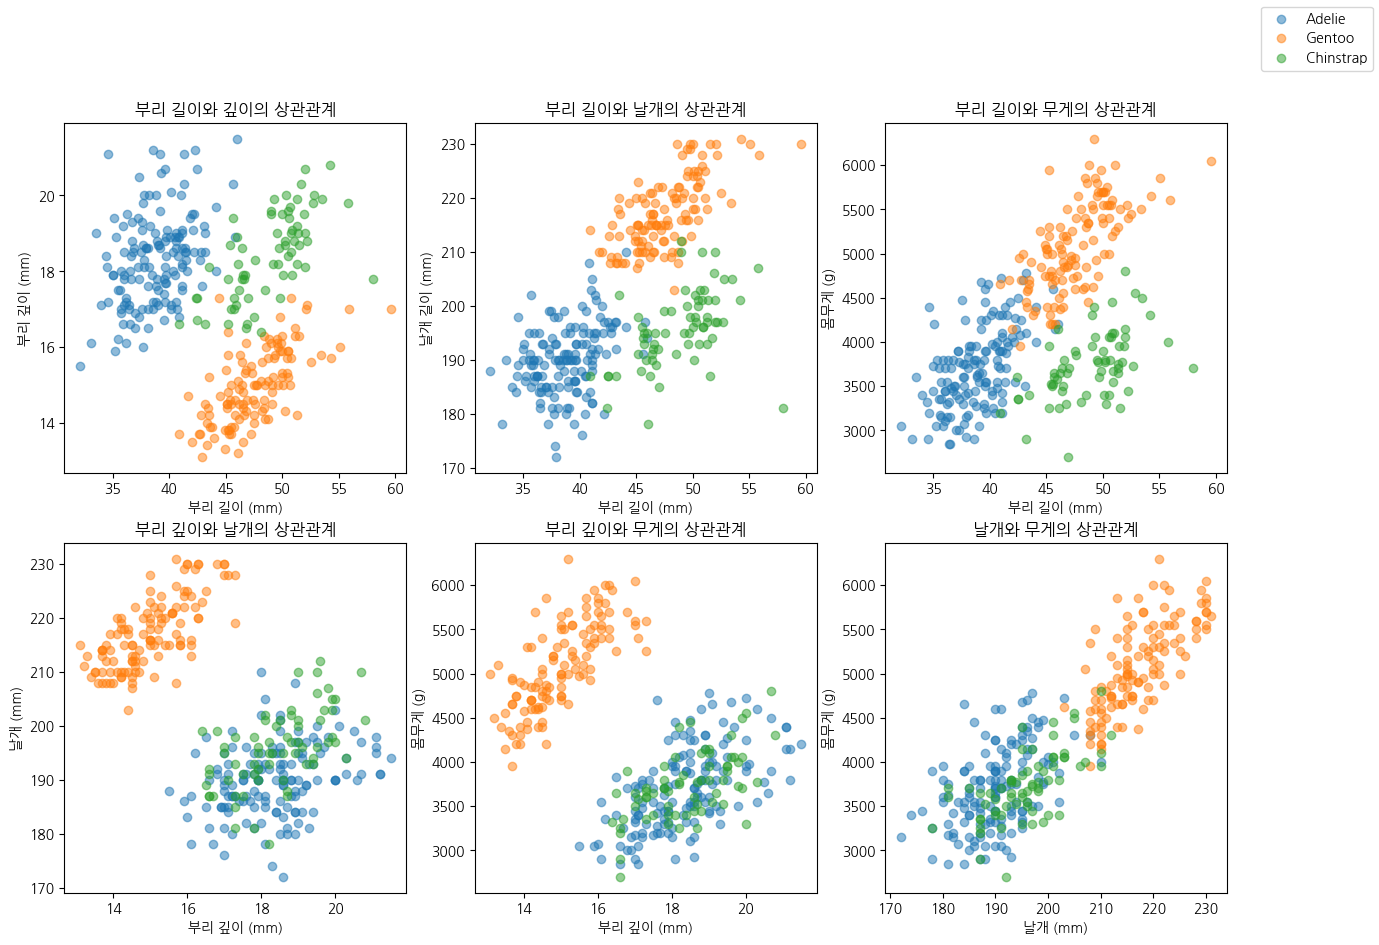

In [7]:
## -----------------------------------------------------
## 단순 반복 작업으로 그래프 구성하기
## -----------------------------------------------------

## 전체 데이터에서 bill_depth_mm는 std가 너무 작음 -> 쓰기 어려울수도
fig, axes = plt.subplots(2,3)
fig.set_size_inches((15,10))
## 종으로 분류해서 신체 특성 확인
## 종 고유값 확인
display(df.species.unique())


## species 기준 인덱싱

###################### 
# # bill_length_mm 비교
# Adelie
sep_Adelie = df[df['species']=='Adelie']
A_bi_le = sep_Adelie.bill_length_mm
A_bi_de = sep_Adelie.bill_depth_mm
A_fl_le = sep_Adelie.flipper_length_mm
A_bo_ma = sep_Adelie.body_mass_g
axes[0,0].scatter(A_bi_le,A_bi_de, label='Adelie', alpha=0.5)
axes[0,1].scatter(A_bi_le,A_fl_le, alpha=0.5)
axes[0,2].scatter(A_bi_le,A_bo_ma, alpha=0.5)

axes[1,0].scatter(A_bi_de,A_fl_le, alpha=0.5)
axes[1,1].scatter(A_bi_de,A_bo_ma, alpha=0.5)
axes[1,2].scatter(A_fl_le,A_bo_ma, alpha=0.5)


# Gentoo
sep_Gentoo = df[df['species']=='Gentoo']
G_bi_le = sep_Gentoo.bill_length_mm
G_bi_de = sep_Gentoo.bill_depth_mm
G_fl_le = sep_Gentoo.flipper_length_mm
G_bo_ma = sep_Gentoo.body_mass_g
axes[0,0].scatter(G_bi_le,G_bi_de, label='Gentoo', alpha=0.5)
axes[0,1].scatter(G_bi_le,G_fl_le, alpha=0.5)
axes[0,2].scatter(G_bi_le,G_bo_ma, alpha=0.5)

axes[1,0].scatter(G_bi_de,G_fl_le, alpha=0.5)
axes[1,1].scatter(G_bi_de,G_bo_ma, alpha=0.5)
axes[1,2].scatter(G_fl_le,G_bo_ma, alpha=0.5)



# Chinstrap
sep_Chinstrap = df[df['species']=='Chinstrap']
C_bi_le = sep_Chinstrap.bill_length_mm
C_bi_de = sep_Chinstrap.bill_depth_mm
C_fl_le = sep_Chinstrap.flipper_length_mm
C_bo_ma = sep_Chinstrap.body_mass_g
axes[0,0].scatter(C_bi_le,C_bi_de, label='Chinstrap', alpha=0.5)
axes[0,1].scatter(C_bi_le,C_fl_le, alpha=0.5)
axes[0,2].scatter(C_bi_le,C_bo_ma, alpha=0.5)

axes[1,0].scatter(C_bi_de,C_fl_le, alpha=0.5)
axes[1,1].scatter(C_bi_de,C_bo_ma, alpha=0.5)
axes[1,2].scatter(C_fl_le,C_bo_ma, alpha=0.5)



## 그래프 꾸미기
axes[0,0].set_title('부리 길이와 깊이의 상관관계')
axes[0,0].set_xlabel('부리 길이 (mm)')
axes[0,0].set_ylabel('부리 깊이 (mm)')

axes[0,1].set_title('부리 길이와 날개의 상관관계')
axes[0,1].set_xlabel('부리 길이 (mm)')
axes[0,1].set_ylabel('날개 길이 (mm)')

axes[0,2].set_title('부리 길이와 무게의 상관관계')
axes[0,2].set_xlabel('부리 길이 (mm)')
axes[0,2].set_ylabel('몸무게 (g)')

axes[1,0].set_title('부리 깊이와 날개의 상관관계')
axes[1,0].set_xlabel('부리 깊이 (mm)')
axes[1,0].set_ylabel('날개 (mm)')

axes[1,1].set_title('부리 깊이와 무게의 상관관계')
axes[1,1].set_xlabel('부리 깊이 (mm)')
axes[1,1].set_ylabel('몸무게 (g)')

axes[1,2].set_title('날개와 무게의 상관관계')
axes[1,2].set_xlabel('날개 (mm)')
axes[1,2].set_ylabel('몸무게 (g)')
fig.legend()
plt.show()


## 해당 그림을 통해 알 수 있는 것. -> 펭귄종에서는 부리 깊이와 나머지 값들을 통해 종류를 구분할 수 있다
## 결론 -> 종에 따라서 펭귄의 신체특성에 큰 영향을 미치는 것으로 보임

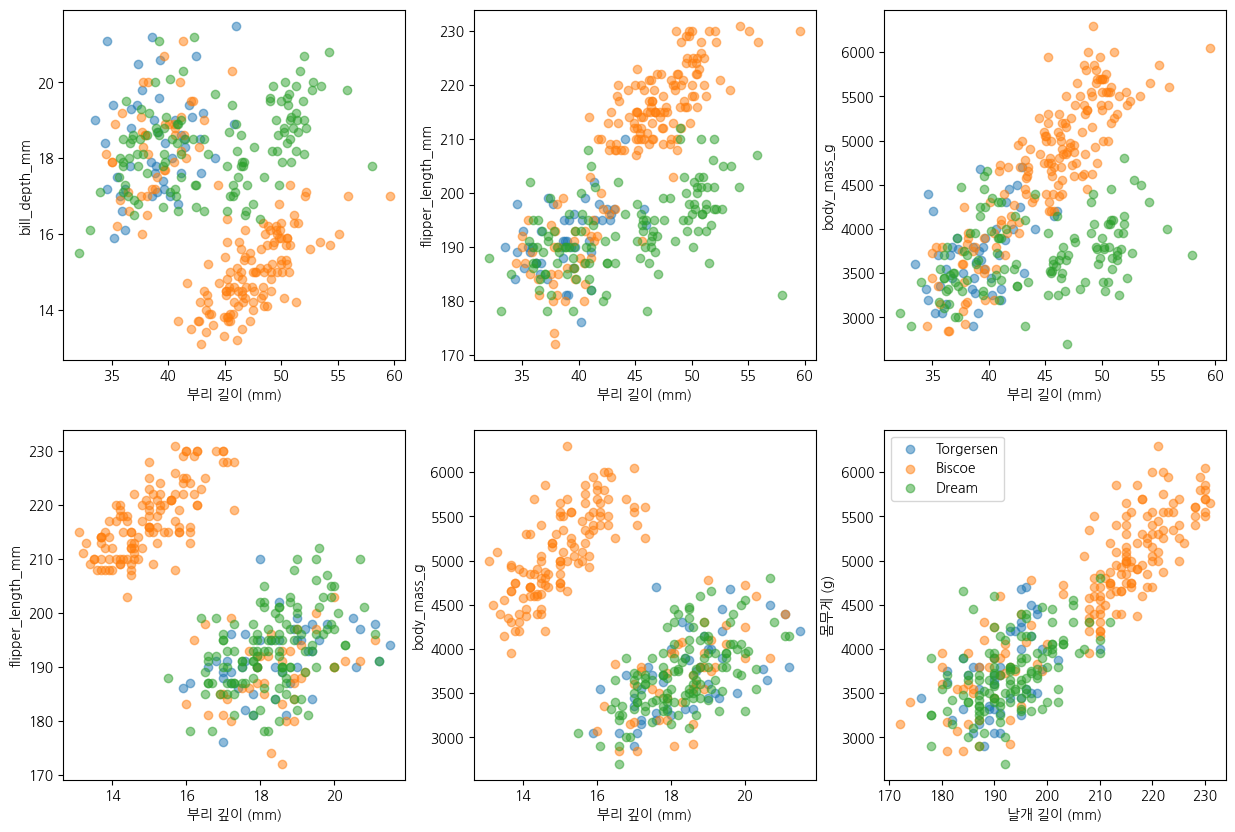

In [8]:
## -----------------------------------------------------
## 반복문을 통해 간단하게 그래프 구성하기
## -----------------------------------------------------

## 전체 데이터에서 bill_depth_mm는 std가 너무 작음 -> 쓰기 어려울수도
df2 = df.copy()

fig, axes = plt.subplots(2,3)
fig.set_size_inches((15,10))
## island 고유값 확인
# display(df.island.unique())

## 필요없는 열 삭제
df2.drop(columns=['species','sex','year'], inplace=True)


## island 기준 인덱싱

## Torgersen ##
## isl_Torgersen
## 길이랑 나머지 특성 비교
isl_Torgersen = df2[df2['island']=='Torgersen']
# display(isl_Torgersen.head())
for idx, col in zip(range(3),isl_Torgersen.columns[2:]):
    axes[0,idx].scatter(isl_Torgersen['bill_length_mm'], isl_Torgersen[col], alpha=0.5)
    axes[0,idx].set_xlabel('부리 길이 (mm)')


    axes[0,idx].set_ylabel(col)
## 나머지 값들 비교
for idx, col in zip(range(2),isl_Torgersen.columns[3:]):
    axes[1,idx].scatter(isl_Torgersen['bill_depth_mm'], isl_Torgersen[col], alpha=0.5)
    axes[1,idx].set_xlabel('부리 깊이 (mm)')
    axes[1,idx].set_ylabel(col)
axes[1,2].scatter(isl_Torgersen['flipper_length_mm'], isl_Torgersen['body_mass_g'], alpha=0.5, label='Torgersen')
axes[1,2].set_xlabel('날개 길이 (mm)')
axes[1,2].set_ylabel('몸무게 (g)')

## Biscoe ##
isl_Biscoe = df2[df2['island']=='Biscoe']
# print(isl_Biscoe.columns)
for idx,col in zip(range(3),isl_Biscoe.columns[2:]):
    axes[0,idx].scatter(isl_Biscoe['bill_length_mm'], isl_Biscoe[col], alpha=0.5)
## 나머지 값들 비교
for idx, col in zip(range(2),isl_Biscoe.columns[3:]):
    axes[1,idx].scatter(isl_Biscoe['bill_depth_mm'], isl_Biscoe[col], alpha=0.5)
axes[1,2].scatter(isl_Biscoe['flipper_length_mm'], isl_Biscoe['body_mass_g'], alpha=0.5, label='Biscoe')


## Dream ##
isl_Dream = df2[df2['island']=='Dream']
for idx,col in zip(range(3),isl_Dream.columns[2:]):
    axes[0,idx].scatter(isl_Dream['bill_length_mm'], isl_Dream[col], alpha=0.5)
## 나머지 값들 비교
for idx, col in zip(range(2),isl_Dream.columns[3:]):
    axes[1,idx].scatter(isl_Dream['bill_depth_mm'], isl_Dream[col], alpha=0.5)
axes[1,2].scatter(isl_Dream['flipper_length_mm'], isl_Dream['body_mass_g'], alpha=0.5, label='Dream')


plt.legend()
plt.show()

## 시각화 결과 -> 지역은 펭귄의 신체특성에 큰 영향을 미치지 않는 것으로 보임

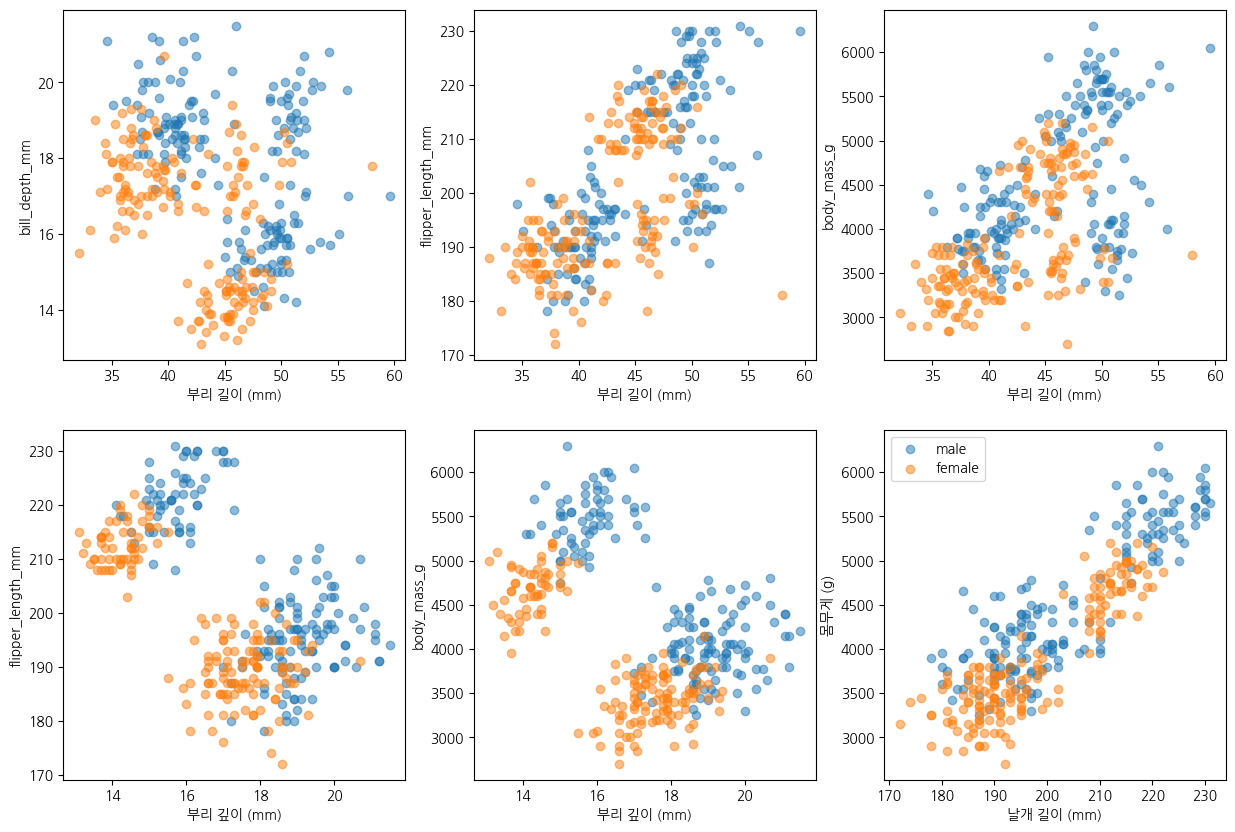

In [9]:
## 전체 데이터에서 bill_depth_mm는 std가 너무 작음 -> 쓰기 어려울수도
df3 = df.copy()
fig, axes = plt.subplots(2,3)
fig.set_size_inches((15,10))


## 필요없는 열 삭제
df3.drop(columns=['species','island','year'], inplace=True)


## sex 기준 인덱싱
## male ##
sex_male = df3[df3['sex']=='male']
# display(sex_male.head())
for idx, col in zip(range(3),sex_male.columns[1:-1]):
    axes[0,idx].scatter(sex_male['bill_length_mm'], sex_male[col], alpha=0.5)
    axes[0,idx].set_xlabel('부리 길이 (mm)')
    axes[0,idx].set_ylabel(col)
## 나머지 값들 비교
for idx, col in zip(range(2),sex_male.columns[2:-1]):
    axes[1,idx].scatter(sex_male['bill_depth_mm'], sex_male[col], alpha=0.5)
    axes[1,idx].set_xlabel('부리 깊이 (mm)')
    axes[1,idx].set_ylabel(col)
axes[1,2].scatter(sex_male['flipper_length_mm'], sex_male['body_mass_g'], alpha=0.5, label='male')
axes[1,2].set_xlabel('날개 길이 (mm)')
axes[1,2].set_ylabel('몸무게 (g)')


## female ##
sex_female = df3[df3['sex']=='female']
# display(sex_male.head())
for idx, col in zip(range(3),sex_female.columns[1:-1]):
    axes[0,idx].scatter(sex_female['bill_length_mm'], sex_female[col], alpha=0.5)
    axes[0,idx].set_xlabel('부리 길이 (mm)')
    axes[0,idx].set_ylabel(col)
## 나머지 값들 비교
for idx, col in zip(range(2),sex_female.columns[2:-1]):
    axes[1,idx].scatter(sex_female['bill_depth_mm'], sex_female[col], alpha=0.5)
axes[1,2].scatter(sex_female['flipper_length_mm'], sex_female['body_mass_g'], alpha=0.5, label='female')


## 그래프 꾸미기
plt.legend()
plt.show()

## 결론 -> 성별에 따라서도 펭귄의 신체특성에 큰 영향을 미치지 않는 것으로 보임 다만, female이 male보다 무게가 작은 경향이 있음

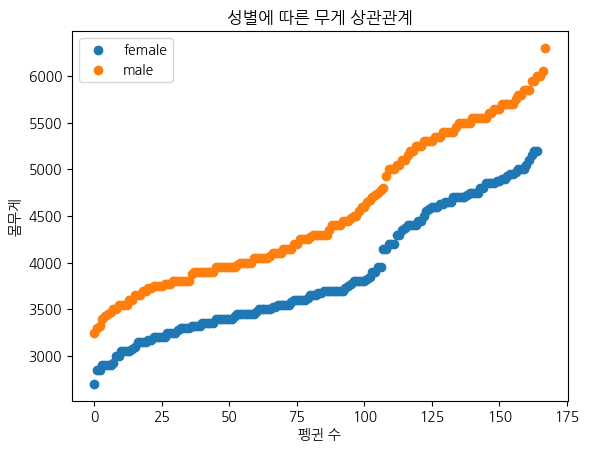

In [32]:
## 성별에 따른 무게 출력
df5 = df.copy()
df5 = df5.sort_values('body_mass_g')
sex_female = df5[df5['sex']=='female']['body_mass_g']
sex_female = sex_female.reset_index(drop=True)
# print(sex_female)

sex_male = df5[df5['sex']=='male']['body_mass_g']
sex_male = sex_male.reset_index(drop=True)

plt.scatter(sex_female.index, sex_female, label='female')
plt.scatter(sex_male.index, sex_male, label='male')


plt.title('성별에 따른 무게 상관관계')
plt.xlabel('펭귄 수')
plt.ylabel('몸무게')
plt.legend()
plt.show()


## 결론 <hr>
- 성별
    * 펭귄은 종(species), 섬(island) 상관없이 성별(sex)에 따라서 male이 female보다 더 무겁다
- 종
    * [ 부리 길이 <-> 날개길이/부리깊이/무게 ] 의 상관 관계로 종은 어느정도 구분이 가능하다. 
        (다른 관계는 종을 구분하기 힘들다.)
- 지역
    * 사는 지역은 펭귄 종을 구분하기 힘들다